## Drill 1.3.3 Present the same data multiple ways

Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

### A - 
<ol>
    <li>Choose one variable and plot that variable four different ways.</li>
    <li>Choose two continuous variables, and plot them three different ways.</li>
<li>Choose one continuous variable and one categorical variable, and plot them six different ways.</li>
</ol>

### B - 
Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/gemma/Documents/data science/DS bootcamp/sf-library-usage-data/Library_Usage.csv', low_memory=False)


df.head(3)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN


In [2]:
def month_to_num(text):
    names = ['January','February','March', 'April', 'May', 'June',
             'July','August','September','October','November', 'December']
    i = 0
    while i < 12:
        if text == names[i]:
            return i+1
        i=i+1
        
df['Active Month Num'] = df['Circulation Active Month'].apply(month_to_num)

df.head(4)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,Active Month Num
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN,11.0
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN,10.0
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN,1.0
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN,2.0


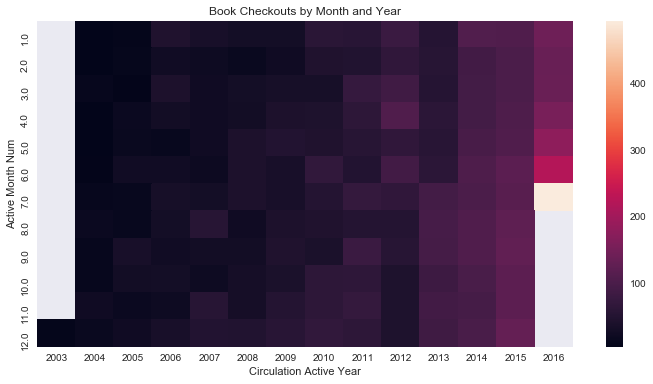

In [17]:
# A.1. Choose one variable and plot it 4 diff ways

# 1/4

# Load the example flights dataset and conver to long-form

sns.set()                      
checkoutsym = df.pivot_table("Total Checkouts", "Active Month Num", "Circulation Active Year")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(checkoutsym, 
            #annot=True, fmt='.2g', 
            linewidths=0, ax=ax)
plt.title('Book Checkouts by Month and Year')
plt.show()

### Pros 
conveys a sense of time visually, and even without the numbers, because of the colors, the change in number of books checked out is clear

### Cons 
looking at each cell you can tell when the amount is differeent, but it doesn't give an idea of the scale of the difference, except for looking at the actual scale on the chart

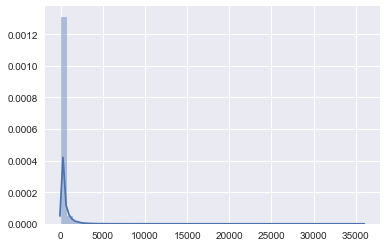

In [4]:
# 2/4

totalco = sorted(list(df['Total Checkouts']))
sns.distplot(totalco)

### Pros
It's simple, easy chart.

### Con 
hard to read, scale is confusing, overall not the best fit for the data

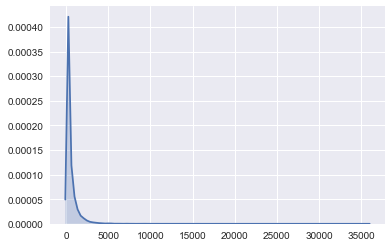

In [5]:
# 3/4

sns.set()
sns.kdeplot(totalco, shade=True, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True)


### Pros 
a little easier to read than the last one, and just as simple
### Cons  
Not visually interesting, scale is still difficult to understand

In [6]:
checkoutsym.head(3)

Circulation Active Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Active Month Num,,,,,,,,,,,,,,
1.0,NaN,3.625,8.324324,44.214286,34.260870,29.421053,29.089431,58.234568,55.898734,79.972136,51.524138,108.669050,106.036326,142.789072
2.0,NaN,4.500,10.750000,25.687500,21.479167,16.168831,23.344262,44.492308,45.950000,64.838596,54.409035,88.762724,99.275198,134.619346
3.0,NaN,11.500,7.195652,41.619048,23.246154,28.816327,33.720280,32.508287,73.602564,86.148936,52.388128,89.848259,100.276444,136.830488


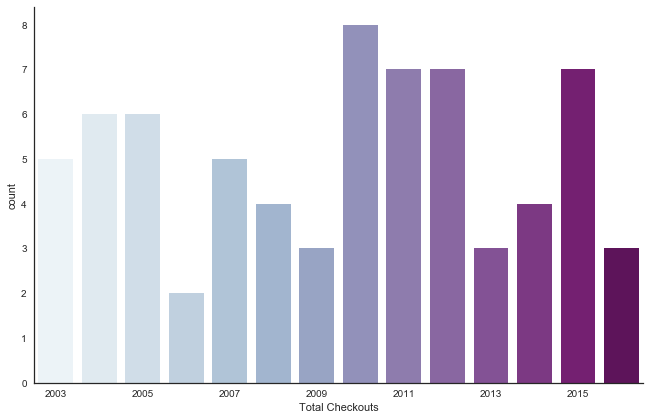

In [7]:
# 4/4 

sns.set(style="white")

years = np.arange(2003,2017)

# Draw a count plot to show the number of checkouts each year
g = sns.factorplot(x="Total Checkouts", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=2)

### Pros 
very easy to read, has the timeline layout which is helpful with this data, and also differences between years are evident without having to look  anywhere else, unlike with the heatmap
### Cons 
I think for this data it works, but for multiple variables it seems like this would get confusing quickly

In [ ]:
# A.2. Choose two continuous variables, and plot them three different ways.

#1/3
# going to use "Total Checkouts" and "Total Renewals" bc those are the only continuous
# variables in this dataset.... 

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = df.sort_values("Total Checkouts", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total Checkouts", y="Active Month Num", data=df,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Total Renewals", y="Active Month Num", data=df,
            label="Total Renewals", color="b")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="Automobile collisions per billion miles")
#sns.despine(left=True, bottom=True)

KeyboardInterrupt: 

In [7]:
df['Counts'] = df.groupby(['Age Range'])['Home Library Code'].transform('count')

num_per_age_range = df.groupby('Age Range')['Home Library Code'].count()

seniorsonly = df[df['Patron Type Definition'] == 'SENIOR']

In [8]:
###### df.groupby('Patron Type Definition')['Total Checkouts'].mean()

In [9]:
df.groupby('Age Range')['Total Checkouts'].mean()

Age Range
0 to 9 years         135.988390
10 to 19 years       236.651042
20 to 24 years       108.856692
25 to 34 years        50.472415
35 to 44 years       110.665351
45 to 54 years       193.190848
55 to 59 years       242.424258
60 to 64 years       271.689646
65 to 74 years       294.584519
75 years and over    325.002191
Name: Total Checkouts, dtype: float64

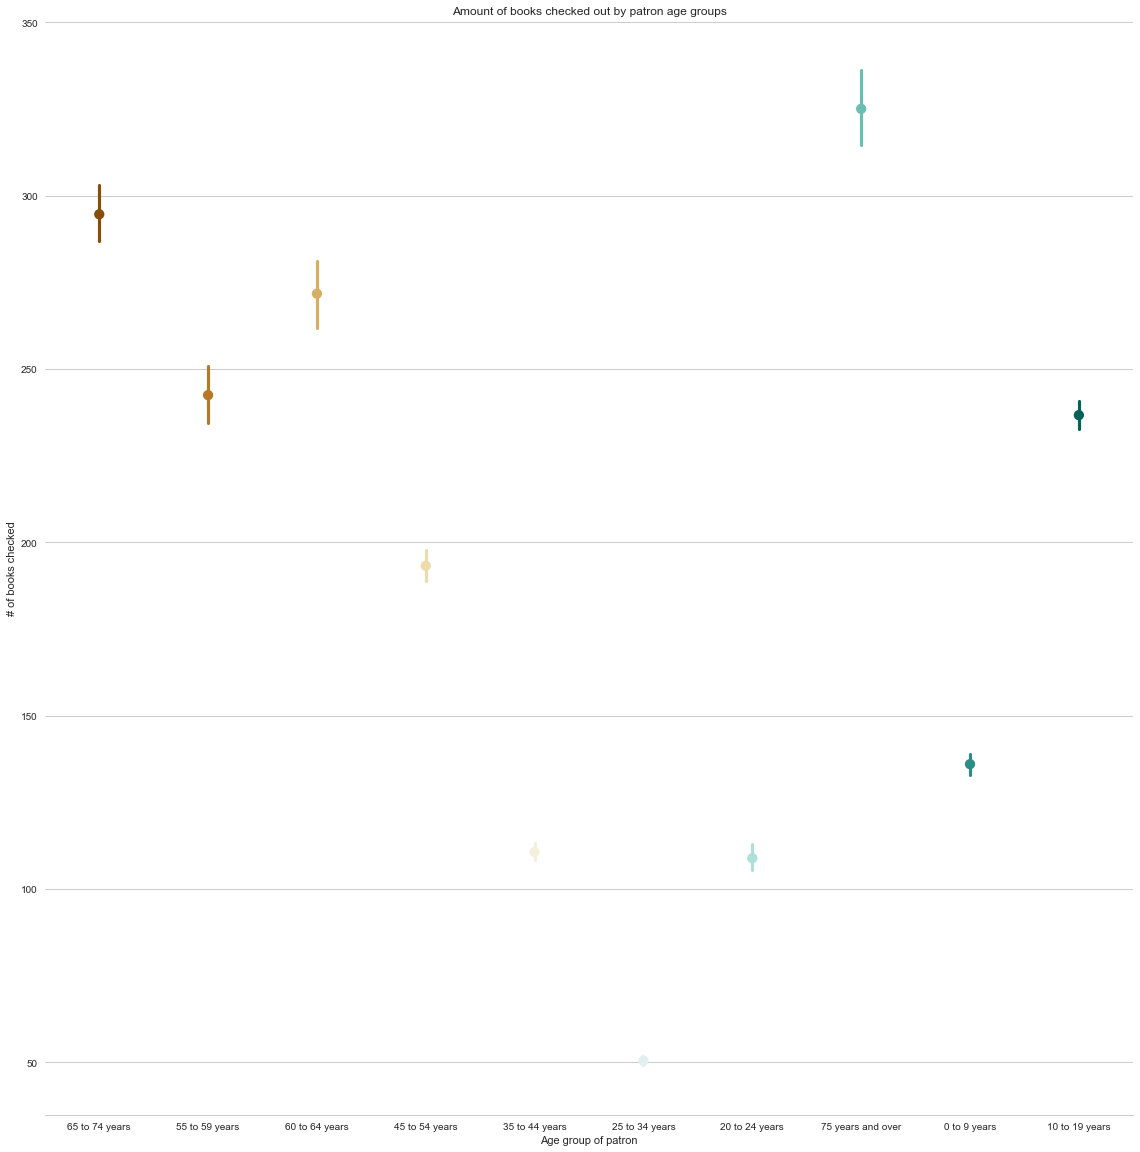

In [10]:
# A.3. one continuous and one categorical data, plotted 6 diff ways

# 1/6
sns.set(style="whitegrid")

g = sns.factorplot(x="Age Range", y="Total Checkouts", 
                   data=df,
                   size=16, kind="point", palette="BrBG",ci=95,dodge=True,join=False,)
g.despine(left=True)
g.set_ylabels("# of books checked")
g.set_xlabels("Age group of patron")
plt.title('Amount of books checked out by patron age groups')
plt.show()

### Pros 
Easy to read (in this case it's difficult becasue the text is small and there is so much data, but with less groups it would be easier), range and average amounts evident at first glance, doesn't waste space

### Cons
Doesn't scale up well - like I said above, with this amount of data it's hard to read, because each group is so small on the chart

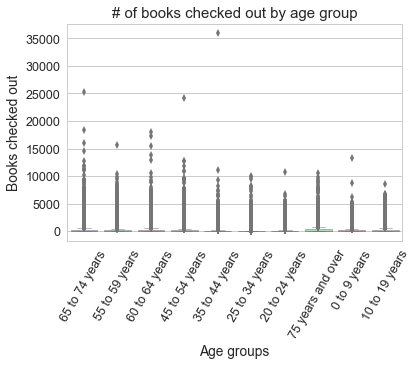

In [11]:
# A.3. - 2/6

sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 0.5,
                                            'figure.figsize':(25,8.5)})

g = sns.boxplot(x="Age Range", y="Total Checkouts", data=df, palette="pastel")
for item in g.get_xticklabels():
    item.set_rotation(60)

plt.title('# of books checked out by age group')

g.set(xlabel='Age groups', ylabel='Books checked out')

plt.show()

### Pros 
Very clear, easy to see the outliers compared to the rest of their group, easy to read

### Cons
Uses a little bit more space to show the range of numbers for each group when compared to the last chart

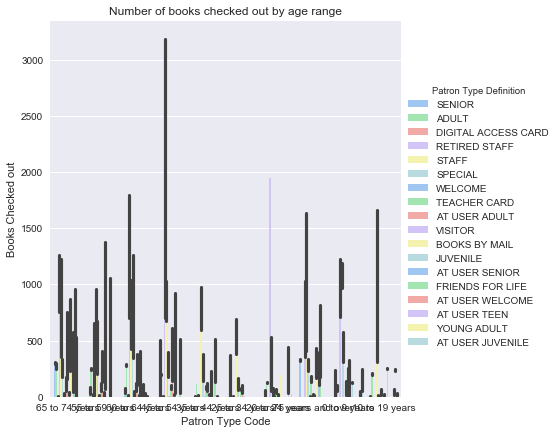

In [12]:
# A.3. one continuous and one categorical data, plotted 6 diff ways

# 3/6

sns.set(style="darkgrid")

g = sns.factorplot(x="Age Range", y="Total Checkouts", hue="Patron Type Definition", data=df,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Books Checked out")
g.set_xlabels("Patron Type Code")
plt.title('Number of books checked out by age range')
plt.show()

### Pros

Able to convey lots of data, shows the full range of each group, breaks it down by age and patron type

### Cons

Becusae they are connected lines, you don't have an idea of what the average value in each group is, or which values are outliers, so it makes the data from group to group look more different

AttributeError: 'str' object has no attribute 'conjugate'

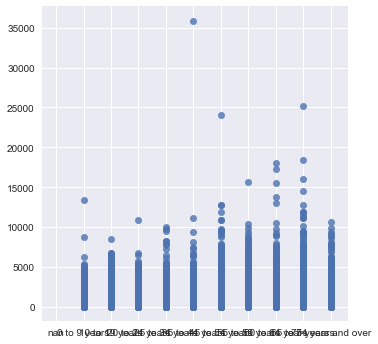

In [62]:
# 4/6

g = sns.lmplot(y='Total Checkouts', x='Age Range', data=df)
g.set_ylabels("Total Checkouts")
g.set_xlabels("Age Range")
plt.title('Scatterplot with regression line: Meal Tips by Total Bill')
plt.show()

### Pros 
The information on the actual plot is clear, outliers are obvious, the trend across groups is visible

### Cons 
The names of the age ranges are hard to read